In [47]:
#import numpy for numerical computing
import numpy as np

#import pandas for Dataframes
import pandas as pd

#Matplotlib for Visualization
from matplotlib import pyplot as plt

#for displaying graph in the notebook
%matplotlib inline

#
import seaborn as sns

#for compatibility with python 3 remove the # sign from below line
#from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [48]:
#read the csv file
df=pd.read_csv('ABT.csv')

In [49]:
df.shape

(148556, 11)

In [50]:
df = df.drop(df.columns[0], axis=1)
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Job_Family_r         object
dtype: object

In [51]:
#

In [52]:
df.head()

EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       0.0  567595.43         567595.43   
1  155966.02    245131.88  137811.38       0.0  538909.28         538909.28   
2  212739.13    106088.18   16452.60       0.0  335279.91         335279.91   
3   77916.00     56120.71  198306.90       0.0  332343.61         332343.61   
4  134401.60      9737.00  182234.59       0.0  326373.19         326373.19   

   Year     Job_Family_r  
0  2011       Management  
1  2011  Police Services  
2  2011  Police Services  
3  2011    Skilled Labor  
4  2011       Management

In [53]:
df.sort_values(by= 'BasePay', axis =0, ascending = True, inplace= True)

In [56]:
# explicity genearting bins for finding distribution. 

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
labels = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000,]
df['labelBasePay'] = pd.cut(df['BasePay'], bins=bins, labels=labels, include_lowest=True)

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
labels = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000,]
df['labelOvertimePay'] = pd.cut(df['OvertimePay'], bins=bins, labels=labels, include_lowest=True)

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]
labels = [0, 50000, 100000, 150000, 200000, 250000]
df['labelOtherPay'] = pd.cut(df['OtherPay'], bins=bins, labels=labels, include_lowest=True)

In [75]:
# create dataframe for different years

In [57]:
df_11 = df.loc[df['Year']==2011]
df_12 = df.loc[df['Year']==2012]
df_13 = df.loc[df['Year']==2013]
df_14 = df.loc[df['Year']==2014]

In [58]:
df_11.tail()

EmployeeName                                JobTitle    BasePay  \
28      DENISE SCHMITT    DEPUTY CHIEF III (POLICE DEPARTMENT)  261717.60   
16            AMY HART                       DEPARTMENT HEAD V  268604.57   
13         JOHN MARTIN                       DEPARTMENT HEAD V  271329.03   
9   JOANNE HAYES-WHITE  CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  285262.00   
12   EDWARD HARRINGTON             EXECUTIVE CONTRACT EMPLOYEE  294580.02   

    OvertimePay  OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  \
28          0.0   2357.00       0.0  264074.60         264074.60  2011   
16          0.0  16115.86       0.0  284720.43         284720.43  2011   
13          0.0  21342.59       0.0  292671.62         292671.62  2011   
9           0.0  17115.73       0.0  302377.73         302377.73  2011   
12          0.0      0.00       0.0  294580.02         294580.02  2011   

   Job_Family_r labelBasePay labelOvertimePay labelOtherPay  
28   Management       250000                0             0  
16   Management       250000                0             0  
13   Management       250000                0             0  
9    Management       250000                0             0  
12   Management       250000                0             0

In [59]:
df_1 = df_11.groupby(['labelBasePay']).OvertimePay.agg({'OvetimePay_2011':'mean'})
df_2 = df_12.groupby(['labelBasePay']).OvertimePay.agg({'OvetimePay_2012':'mean'})
df_3 = df_13.groupby(['labelBasePay']).OvertimePay.agg({'OvetimePay_2013':'mean'})
df_4 = df_14.groupby(['labelBasePay']).OvertimePay.agg({'OvetimePay_2014':'mean'})


# Plot for OvertimePay vs BasePay

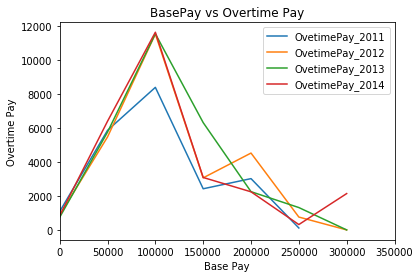

In [60]:
#plot for OvertimePay vs BasePay
plt.figure(figsize=(50,30))
ax = df_1.plot()
ax2 = df_2.plot(ax = ax)
ax3 = df_3.plot(ax =ax2)
df_4.plot(ax = ax3)

ax.set_xlabel('Base Pay')
ax.set_ylabel('Overtime Pay')

ax.set_title('BasePay vs Overtime Pay')
plt.show()

In [61]:
df_1 = df_11.groupby(['labelBasePay']).OtherPay.agg({'OtherPay_2011':'mean'})
df_2 = df_12.groupby(['labelBasePay']).OtherPay.agg({'OtherPay_2012':'mean'})
df_3 = df_13.groupby(['labelBasePay']).OtherPay.agg({'OtherPay_2013':'mean'})
df_4 = df_14.groupby(['labelBasePay']).OtherPay.agg({'OtherPay_2014':'mean'})

# Plot for Other Pay vs Base Pay

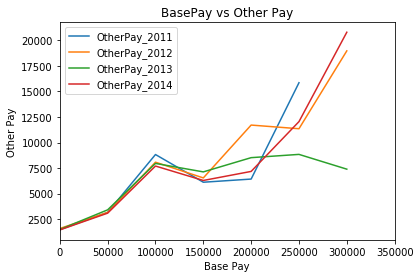

In [62]:
#plot for Other Pay vs Base Pay
plt.figure(figsize=(50,30))
ax = df_1.plot()
ax2 = df_2.plot(ax = ax)
ax3 = df_3.plot(ax =ax2)
df_4.plot(ax = ax3)
ax.set_xlabel('Base Pay')
ax.set_ylabel('Other Pay')

ax.set_title('BasePay vs Other Pay')
plt.show()

In [63]:
df_1 = df_11.groupby(['labelBasePay']).Benefits.agg({'Benefits_2011':'mean'})
df_2 = df_12.groupby(['labelBasePay']).Benefits.agg({'Benefits_2012':'mean'})
df_3 = df_13.groupby(['labelBasePay']).Benefits.agg({'Benefits_2013':'mean'})
df_4 = df_14.groupby(['labelBasePay']).Benefits.agg({'Benefits_2014':'mean'})

# Plot for Benefits vs BasePay

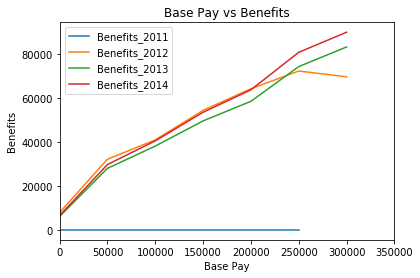

In [64]:
#plot for Benefits vs BasePay
plt.figure(figsize=(50,30))
ax = df_1.plot()
ax2 = df_2.plot(ax = ax)
ax3 = df_3.plot(ax =ax2)
df_4.plot(ax = ax3)

ax.set_xlabel('Base Pay')
ax.set_ylabel('Benefits')

ax.set_title('Base Pay vs Benefits')
plt.show()

In [79]:
# DataFrame for Job Family Wise Base Pay vs Other Pay

In [65]:
df_1 = df_11.groupby(['Job_Family_r', 'labelBasePay']).OtherPay.agg({'OtherPay_2011':'mean'}).reset_index()
df_2 = df_12.groupby(['Job_Family_r', 'labelBasePay']).OtherPay.agg({'OtherPay_2012':'mean'}).reset_index()
df_3 = df_13.groupby(['Job_Family_r', 'labelBasePay']).OtherPay.agg({'OtherPay_2013':'mean'}).reset_index()
df_4 = df_14.groupby(['Job_Family_r', 'labelBasePay']).OtherPay.agg({'OtherPay_2014':'mean'}).reset_index()

In [ ]:
#check the records
df_1.head()

In [67]:
df_1.shape

(173, 3)

# year on year trend for Other Pay vs Base Pay across job families

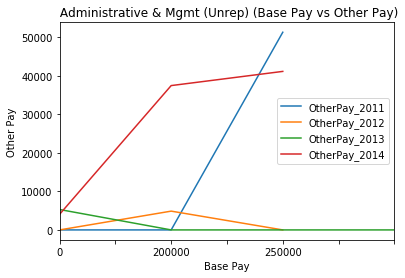

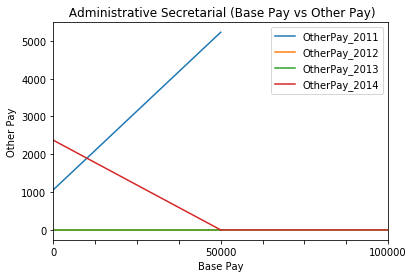

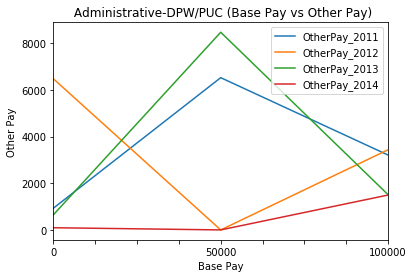

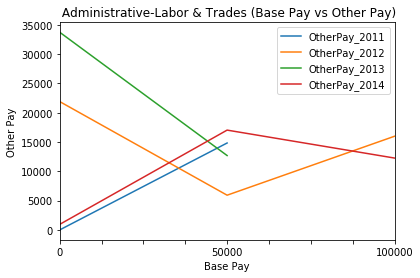

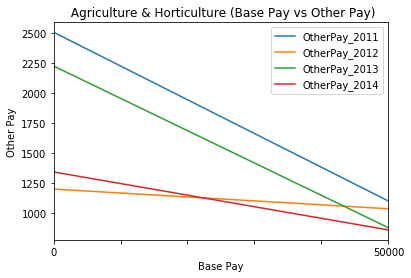

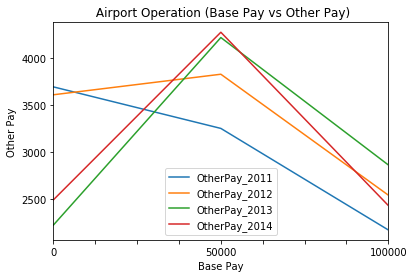

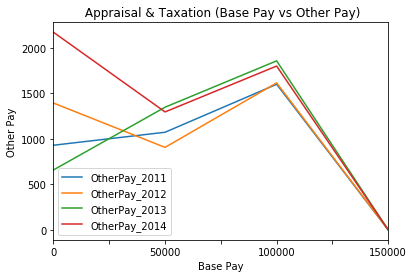

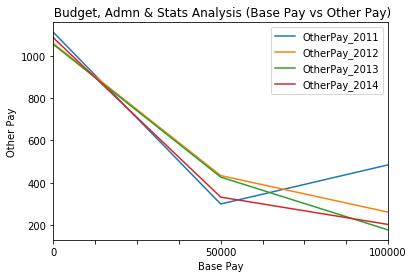

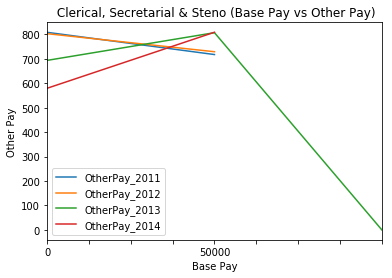

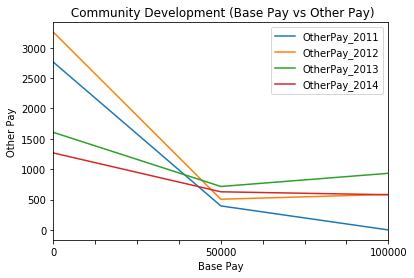

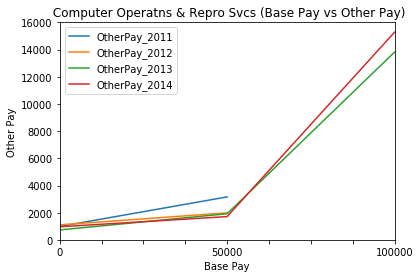

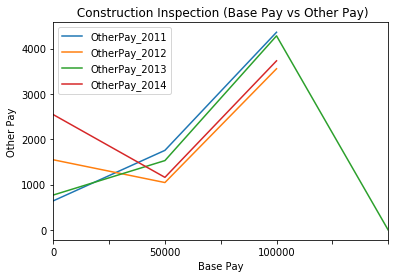

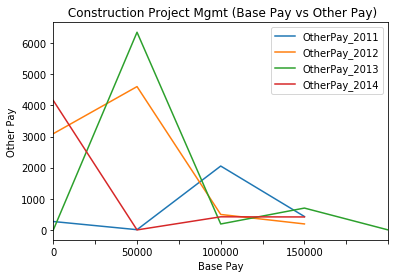

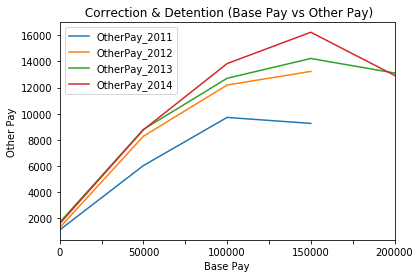

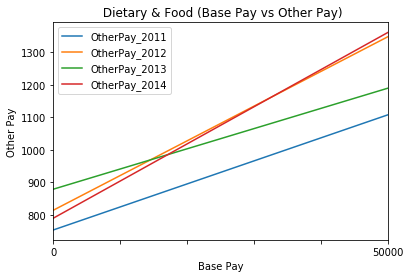

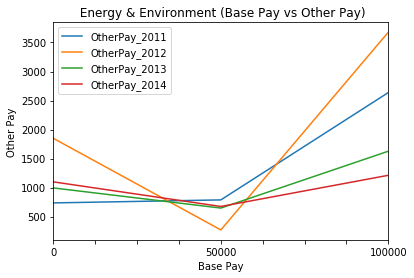

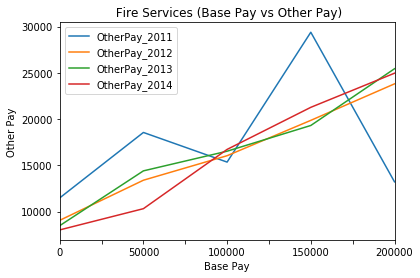

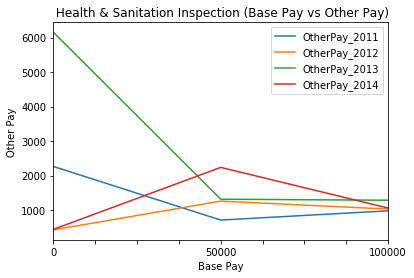

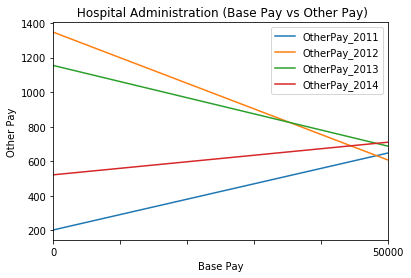

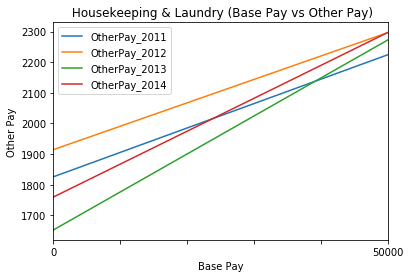

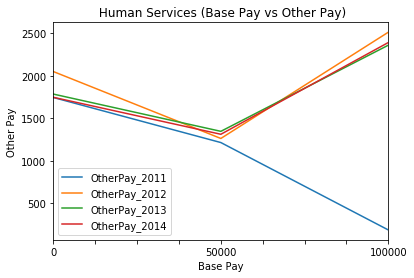

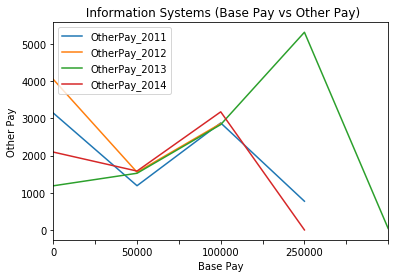

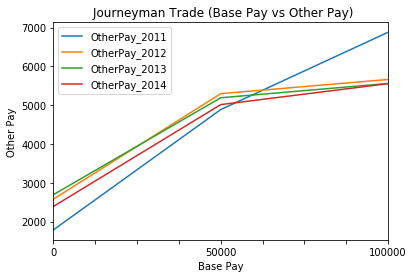

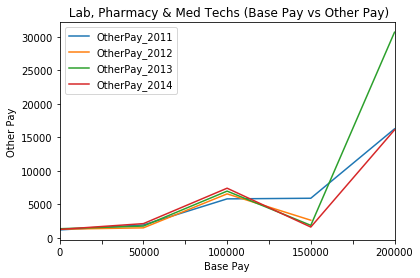

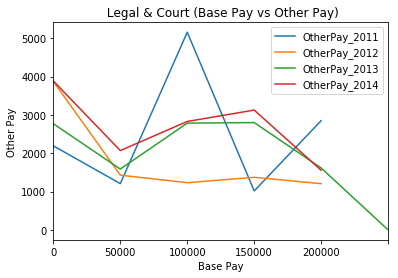

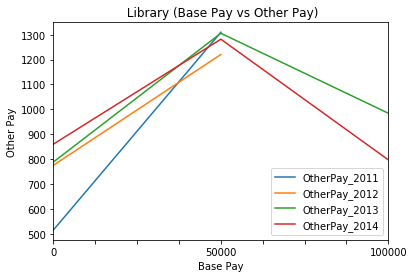

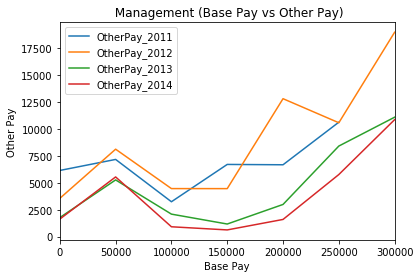

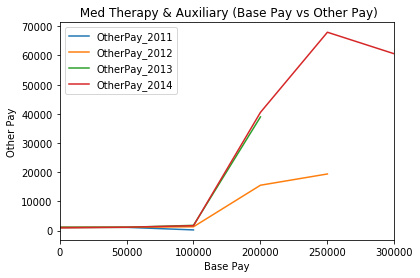

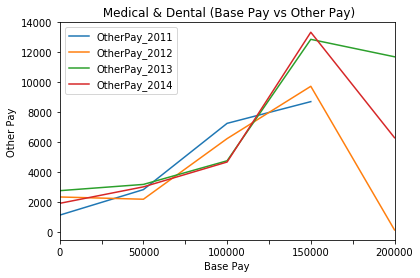

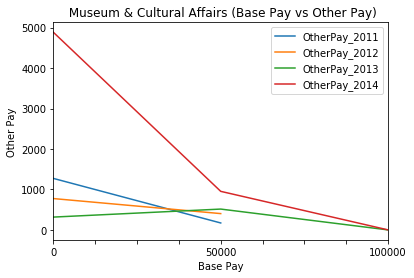

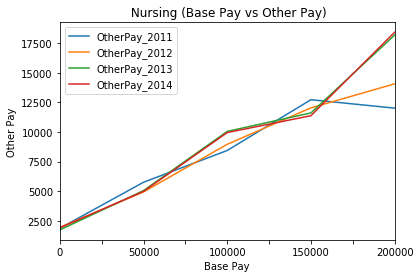

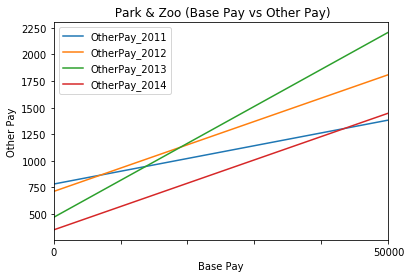

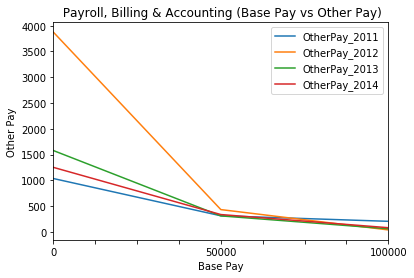

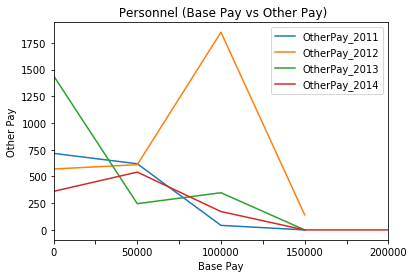

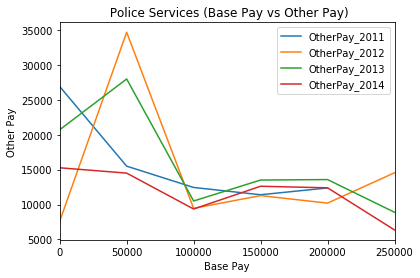

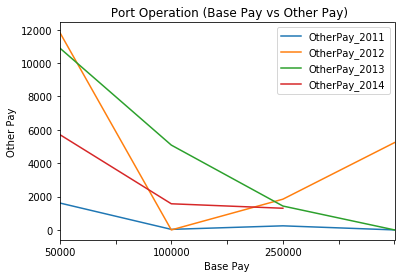

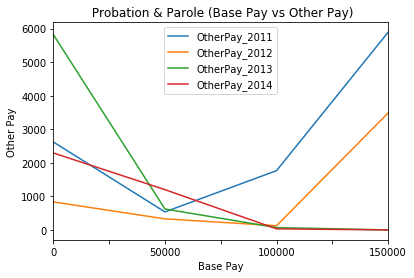

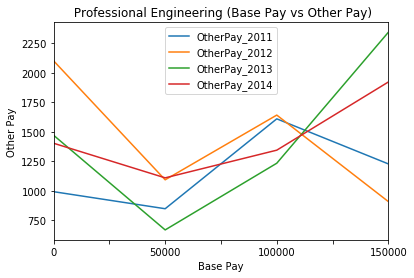

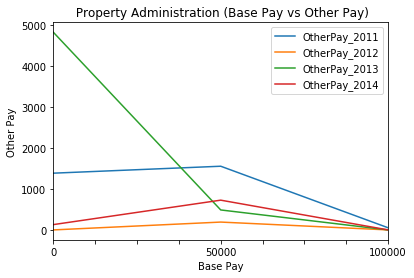

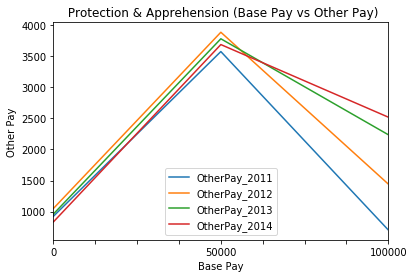

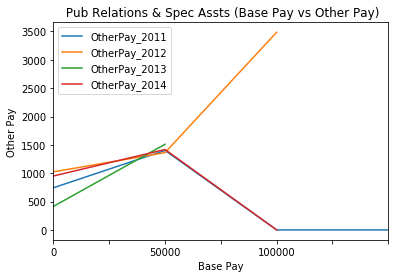

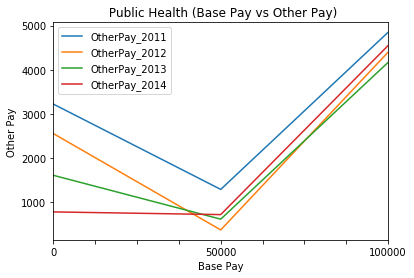

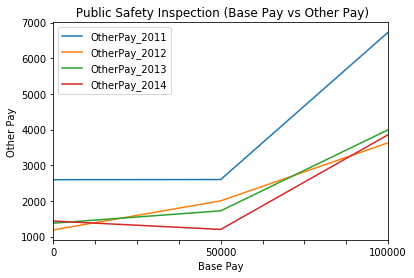

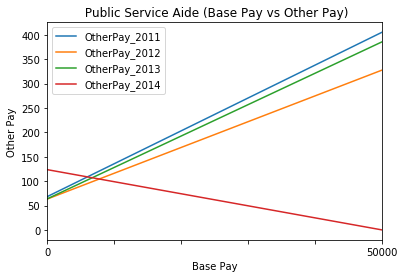

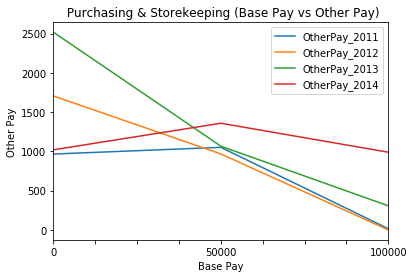

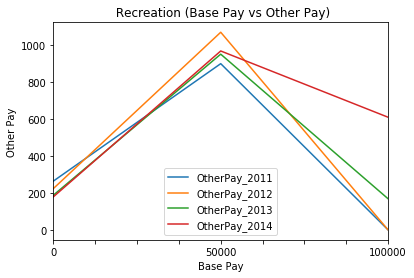

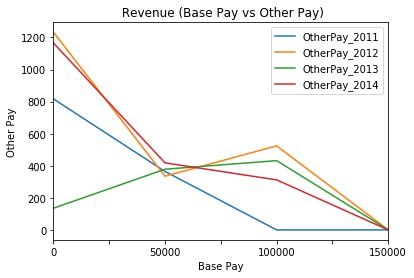

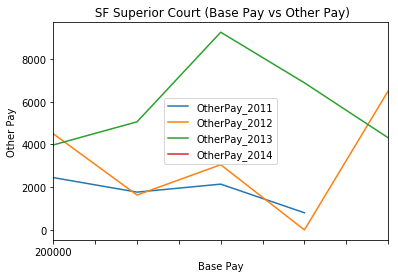

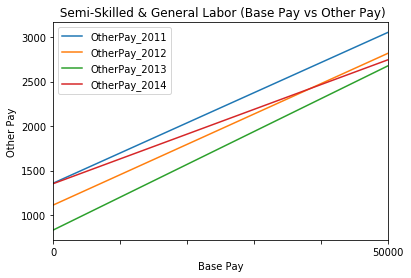

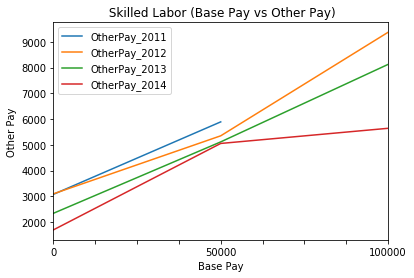

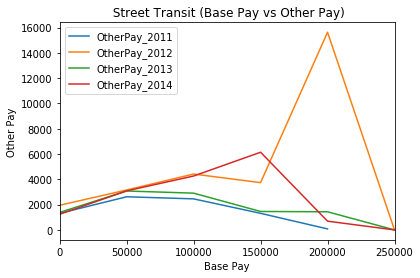

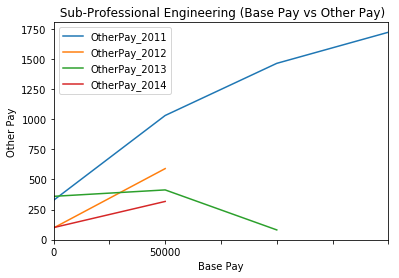

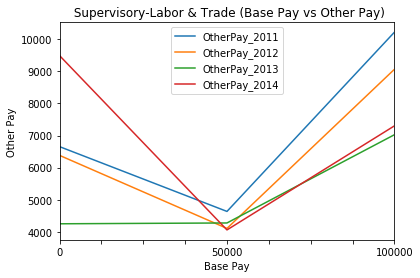

In [68]:
for title in df_1['Job_Family_r'].unique():
    df_per_title_11 = df_1.loc[df_1['Job_Family_r']==title]
    df_per_title_12 = df_2.loc[df_2['Job_Family_r']==title]
    df_per_title_13 = df_3.loc[df_3['Job_Family_r']==title]
    df_per_title_14 = df_4.loc[df_4['Job_Family_r']==title]
    #plot for OtherPay vs BasePay
    
    plt.figure(figsize=(50,30))
    ax = df_per_title_11.plot(x= 'labelBasePay', y='OtherPay_2011')
    ax2 = df_per_title_12.plot(x= 'labelBasePay', y= 'OtherPay_2012', ax = ax)
    ax3 = df_per_title_13.plot(x= 'labelBasePay', y= 'OtherPay_2013',ax =ax2)
    df_per_title_14.plot(x= 'labelBasePay', y= 'OtherPay_2014',ax = ax3)
    ax.set_xlabel('Base Pay')
    ax.set_ylabel('Other Pay')

    ax.set_title(' %s (Base Pay vs Other Pay)'%title)
    plt.show()

# DataFrame for Job Family Wise Base Pay vs Overtime Pay

In [69]:
df_1 = df_11.groupby(['Job_Family_r', 'labelBasePay']).OvertimePay.agg({'OvertimePay_2011':'mean'}).reset_index()
df_2 = df_12.groupby(['Job_Family_r', 'labelBasePay']).OvertimePay.agg({'OvertimePay_2012':'mean'}).reset_index()
df_3 = df_13.groupby(['Job_Family_r', 'labelBasePay']).OvertimePay.agg({'OvertimePay_2013':'mean'}).reset_index()
df_4 = df_14.groupby(['Job_Family_r', 'labelBasePay']).OvertimePay.agg({'OvertimePay_2014':'mean'}).reset_index()

# year on year trend for Overtime Pay vs Base Pay across job families

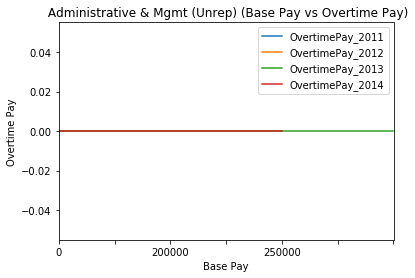

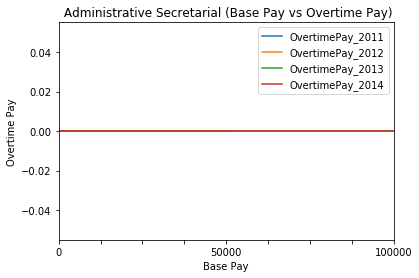

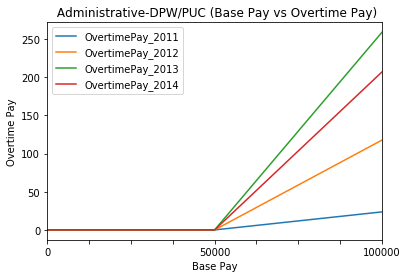

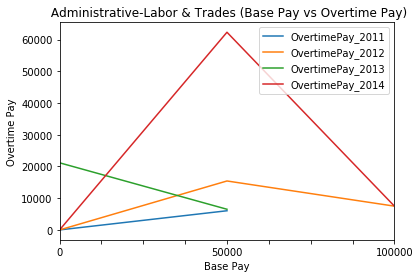

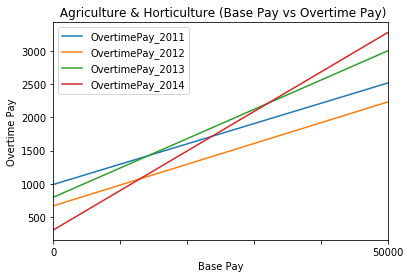

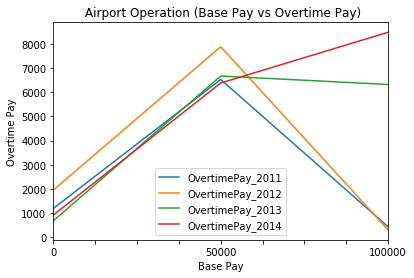

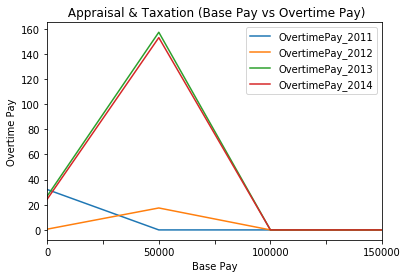

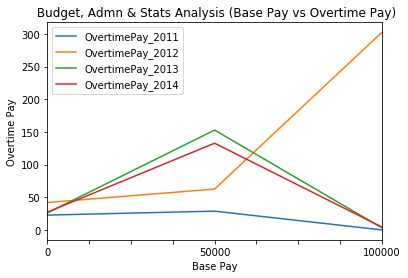

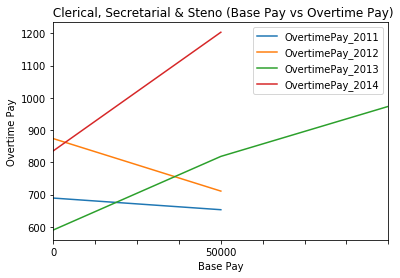

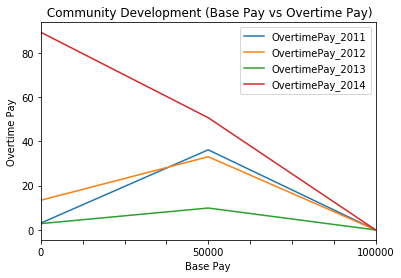

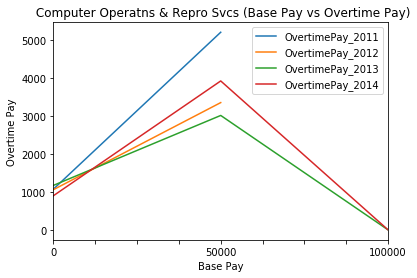

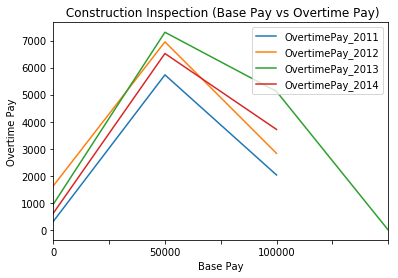

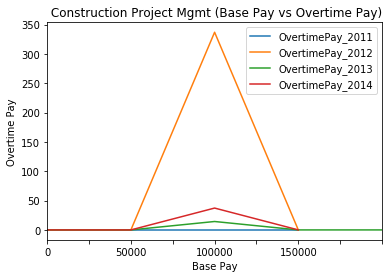

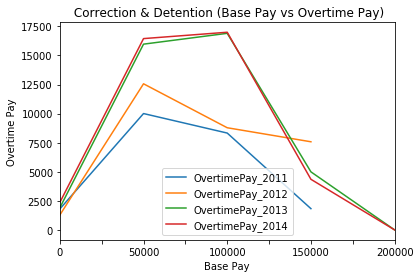

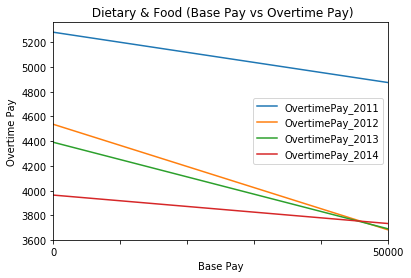

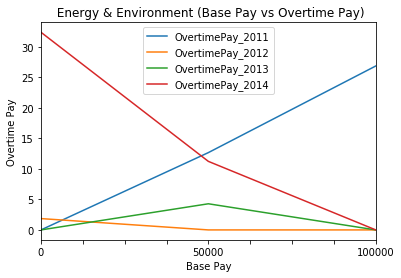

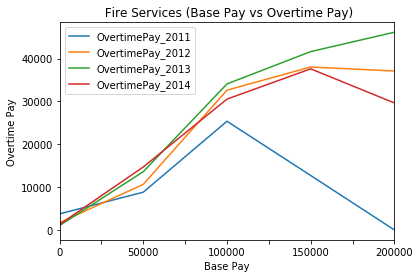

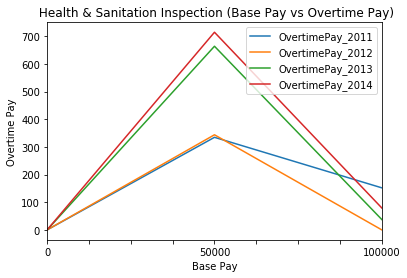

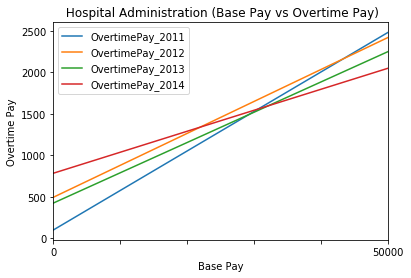

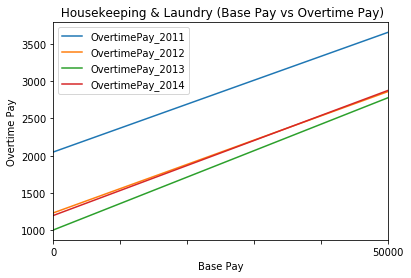

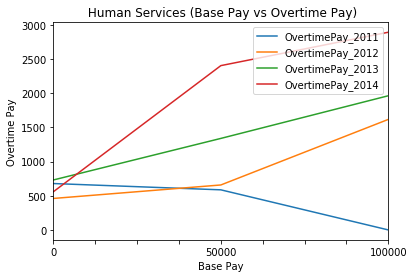

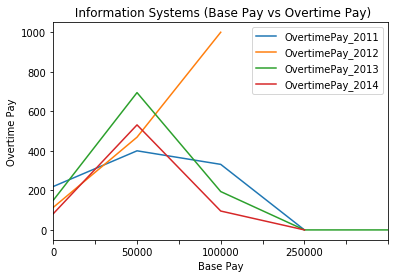

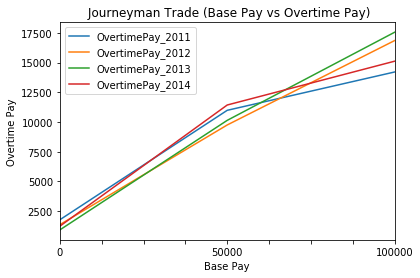

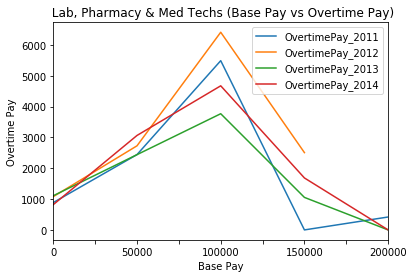

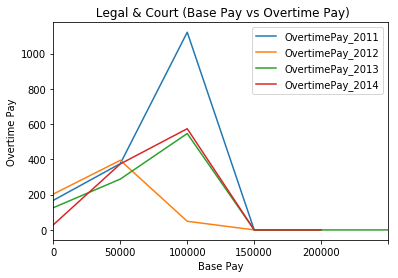

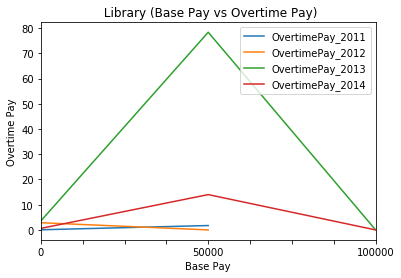

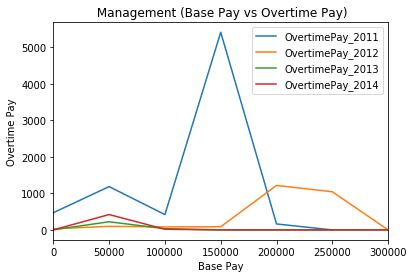

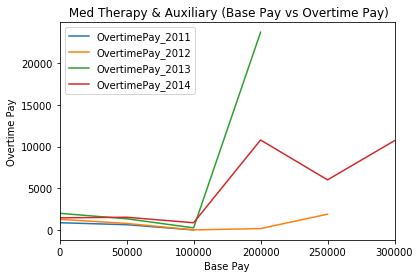

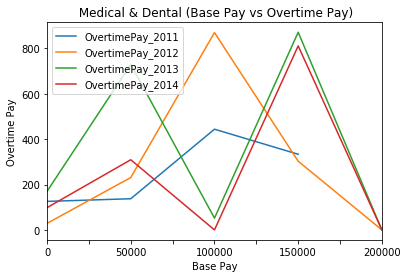

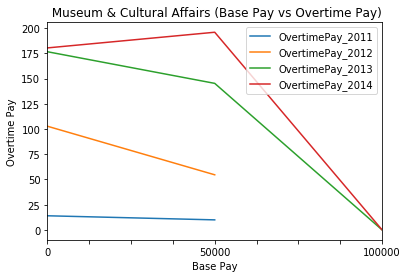

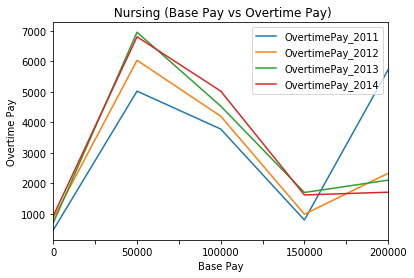

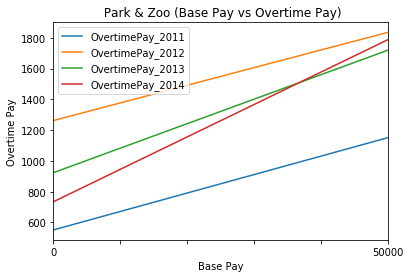

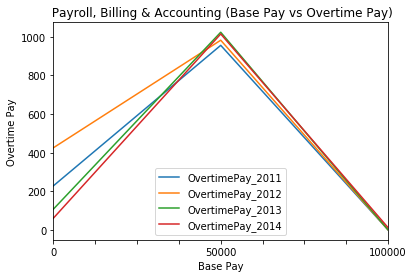

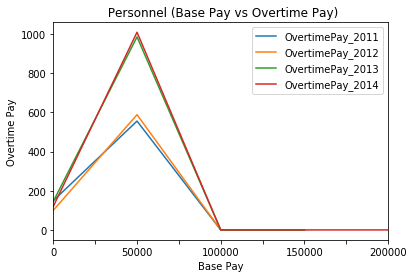

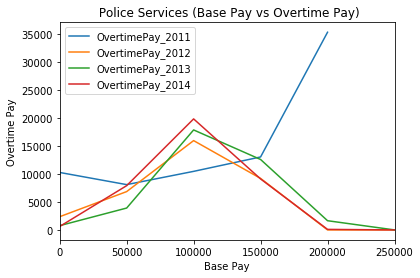

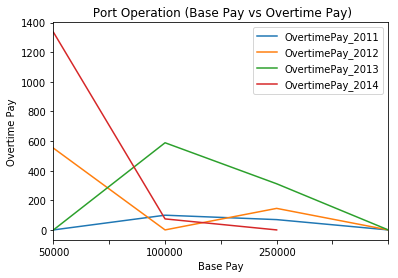

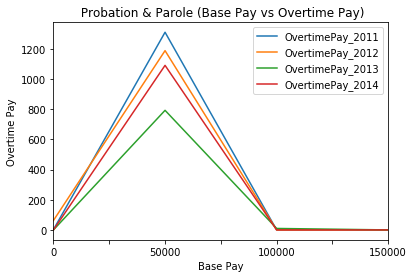

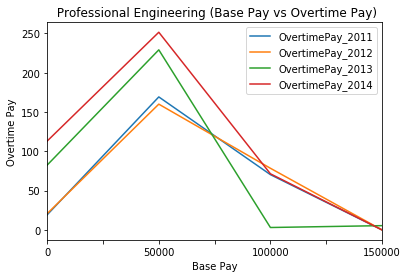

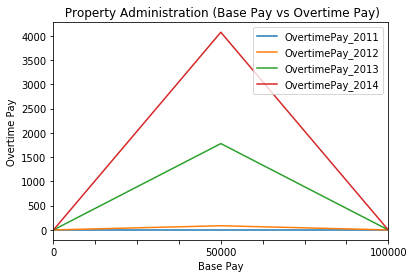

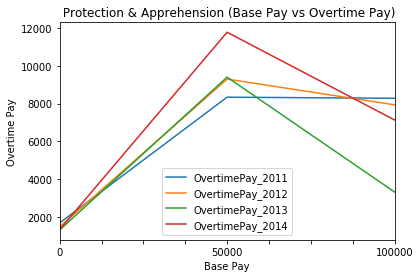

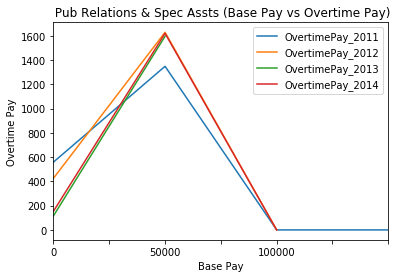

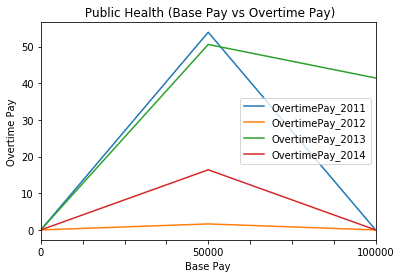

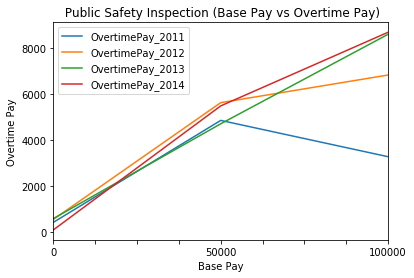

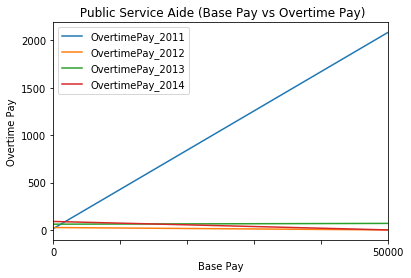

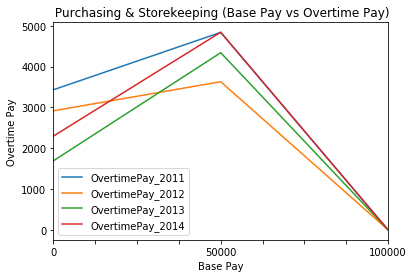

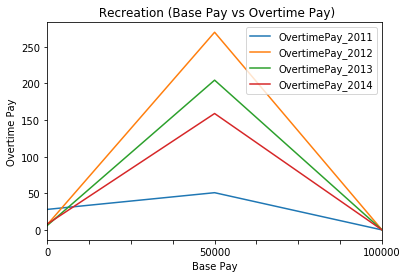

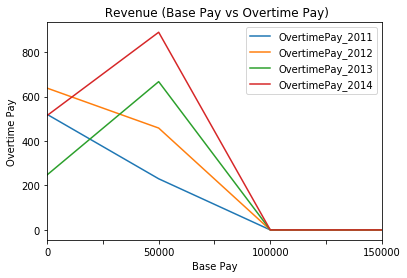

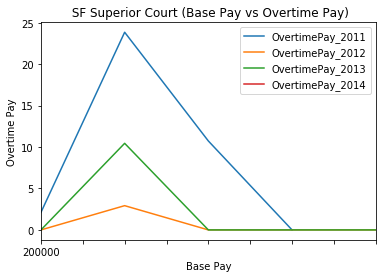

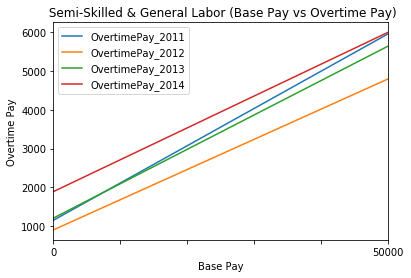

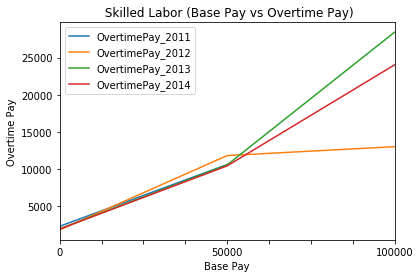

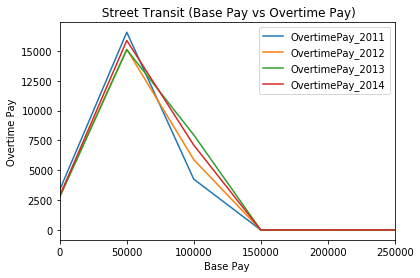

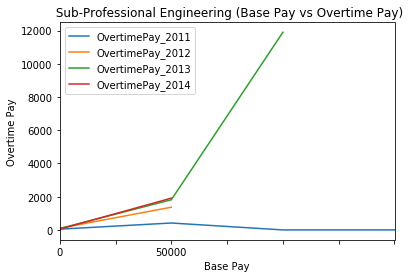

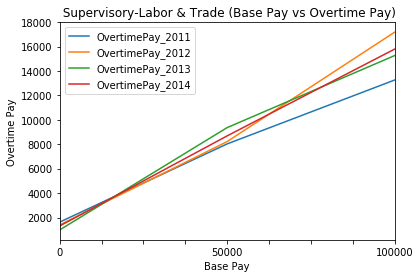

In [71]:
for title in df_1['Job_Family_r'].unique():
    df_per_title_11 = df_1.loc[df_1['Job_Family_r']==title]
    df_per_title_12 = df_2.loc[df_2['Job_Family_r']==title]
    df_per_title_13 = df_3.loc[df_3['Job_Family_r']==title]
    df_per_title_14 = df_4.loc[df_4['Job_Family_r']==title]
    #plot for OtherPay vs BasePay
    
    plt.figure(figsize=(50,30))
    ax = df_per_title_11.plot(x= 'labelBasePay', y='OvertimePay_2011')
    ax2 = df_per_title_12.plot(x= 'labelBasePay', y= 'OvertimePay_2012', ax = ax)
    ax3 = df_per_title_13.plot(x= 'labelBasePay', y= 'OvertimePay_2013',ax =ax2)
    df_per_title_14.plot(x= 'labelBasePay', y= 'OvertimePay_2014',ax = ax3)
    ax.set_xlabel('Base Pay')
    ax.set_ylabel('Overtime Pay')

    ax.set_title(' %s (Base Pay vs Overtime Pay)'%title)
    plt.show()

# Create dataframe for Benefits

In [76]:
df_1 = df_11.groupby(['Job_Family_r', 'labelBasePay']).Benefits.agg({'Benefits_2011':'mean'}).reset_index()
df_2 = df_12.groupby(['Job_Family_r', 'labelBasePay']).Benefits.agg({'Benefits_2012':'mean'}).reset_index()
df_3 = df_13.groupby(['Job_Family_r', 'labelBasePay']).Benefits.agg({'Benefits_2013':'mean'}).reset_index()
df_4 = df_14.groupby(['Job_Family_r', 'labelBasePay']).Benefits.agg({'Benefits_2014':'mean'}).reset_index()

# year on year trend for benefit vs base pay across job families

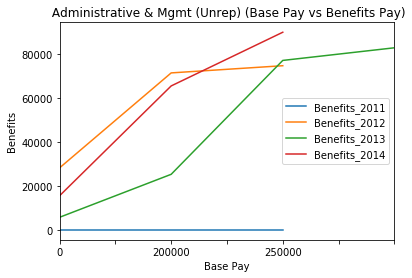

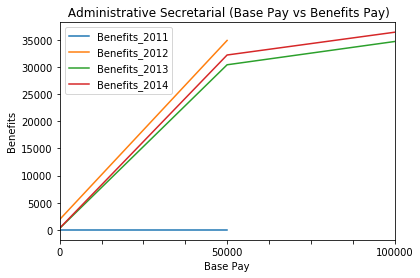

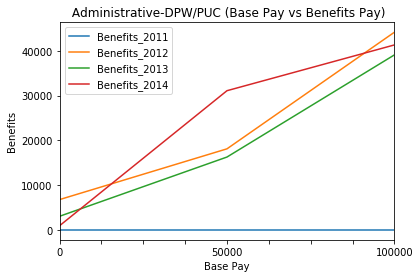

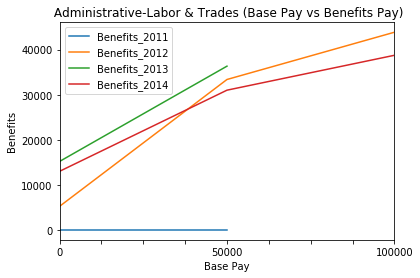

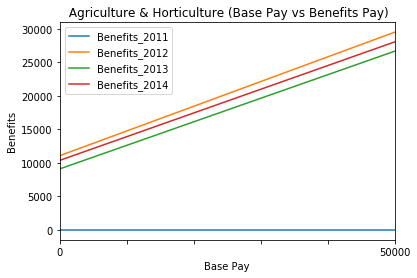

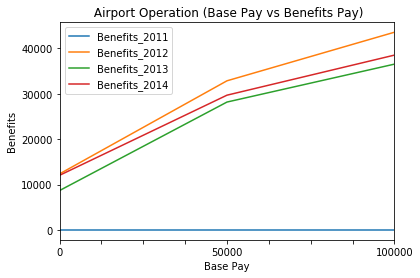

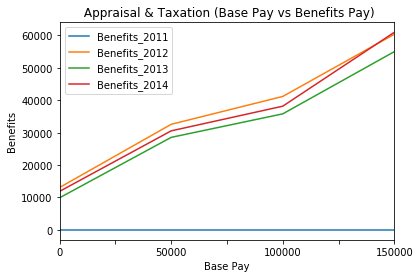

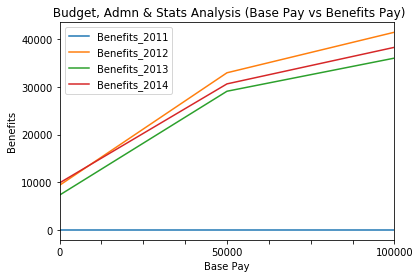

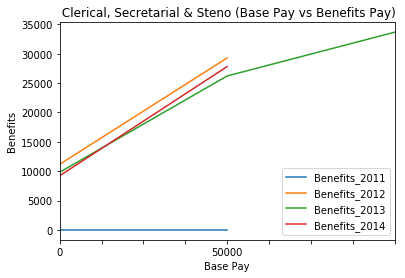

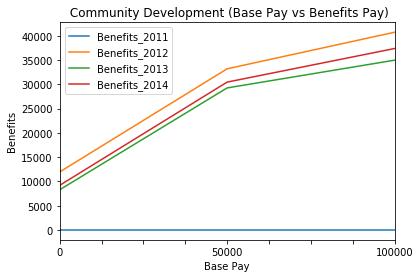

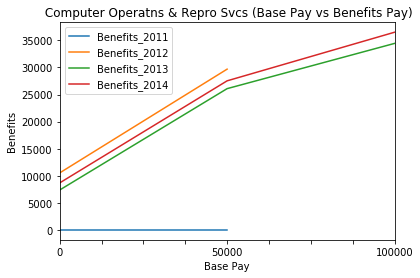

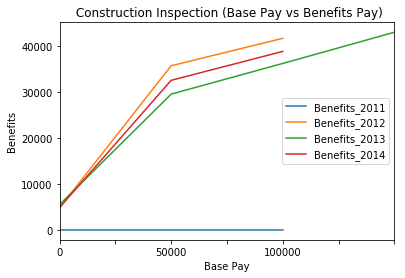

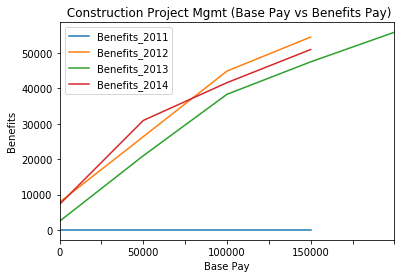

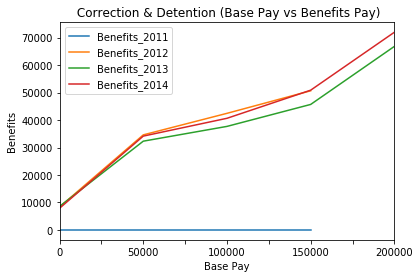

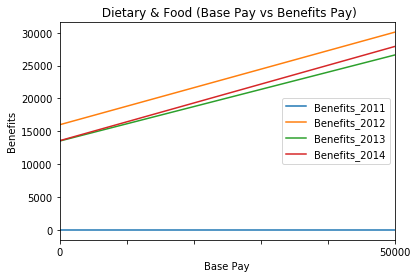

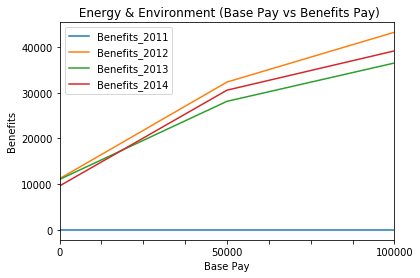

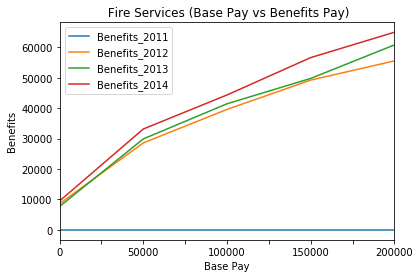

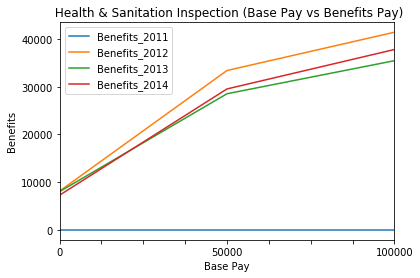

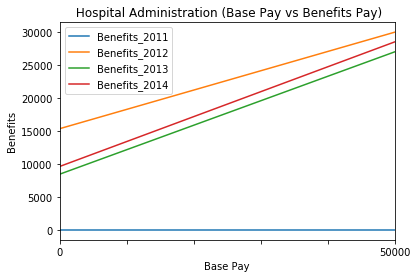

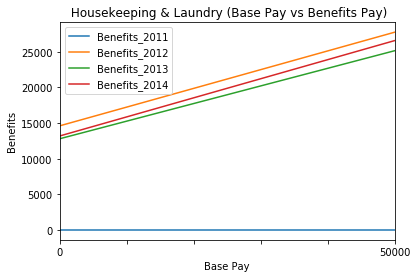

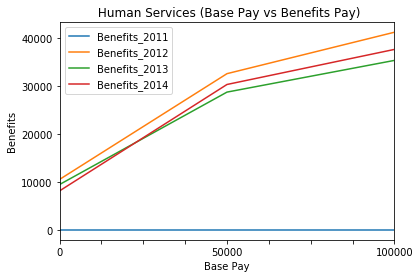

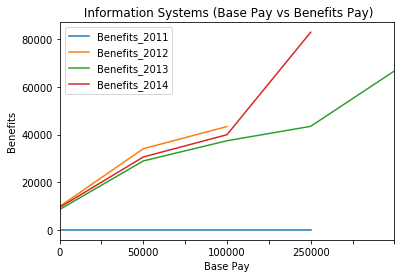

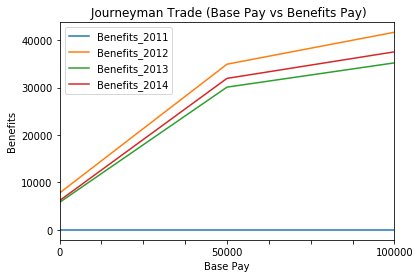

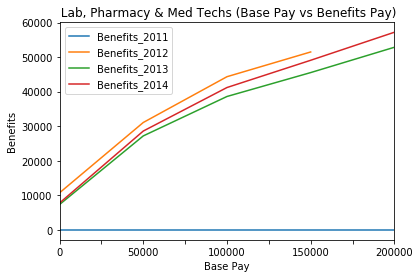

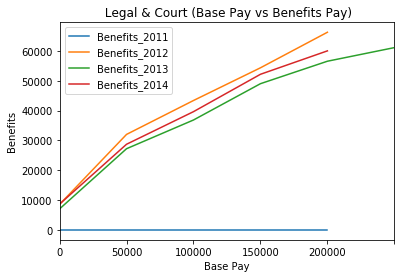

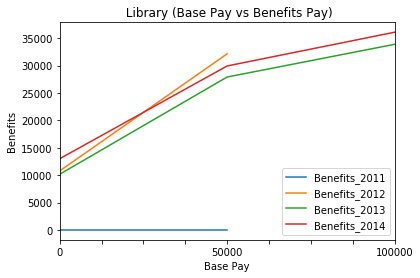

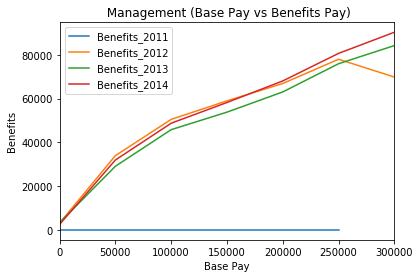

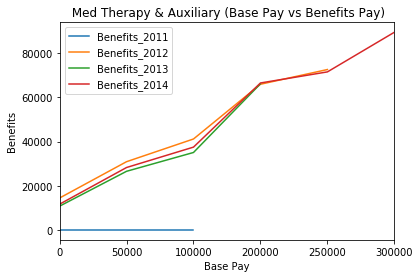

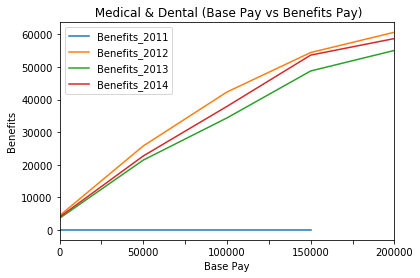

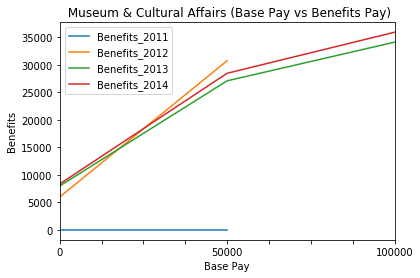

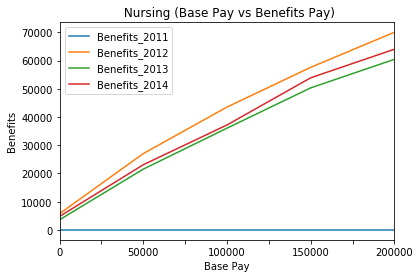

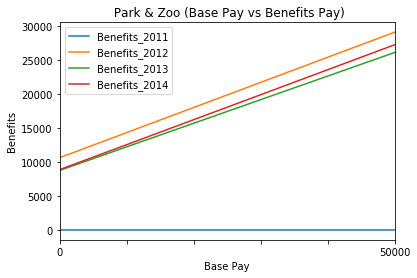

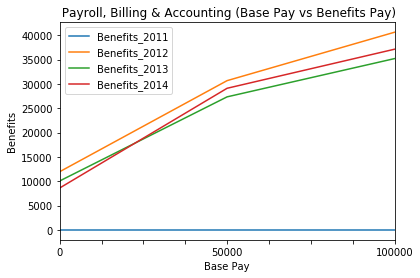

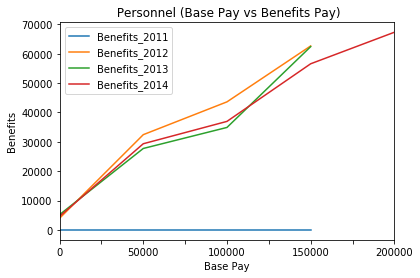

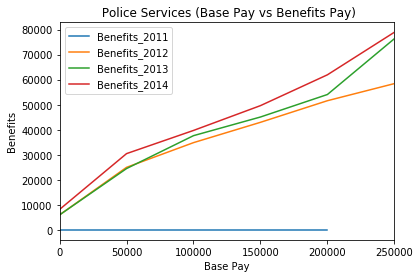

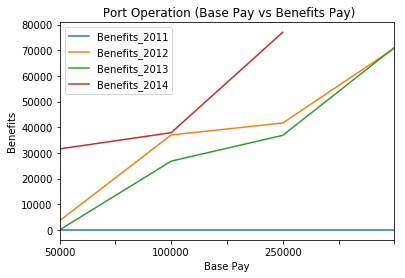

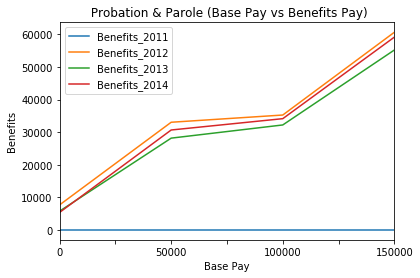

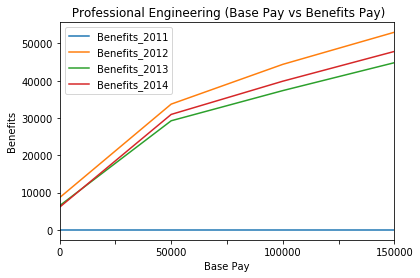

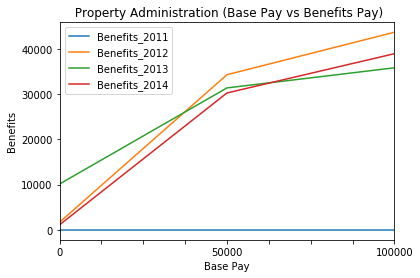

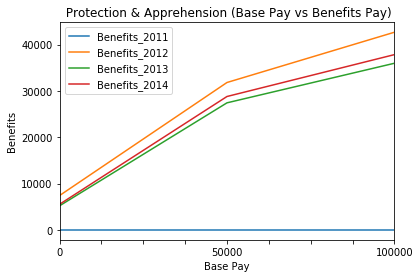

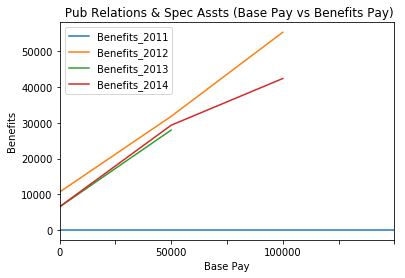

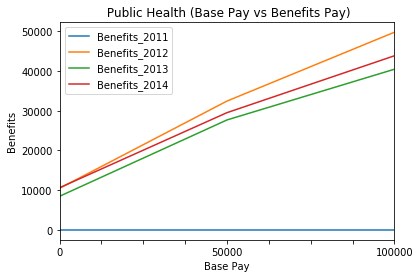

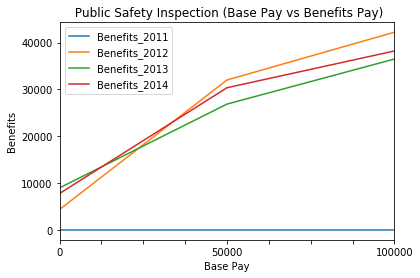

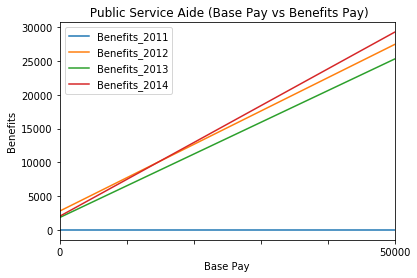

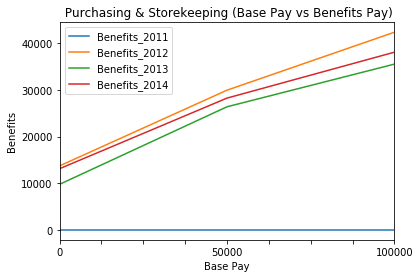

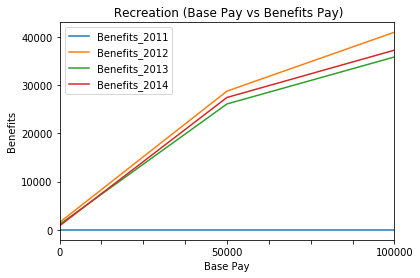

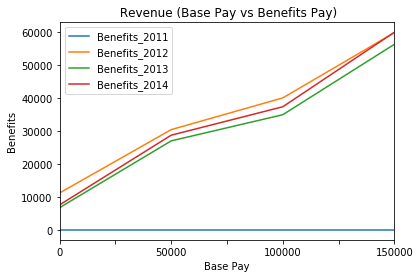

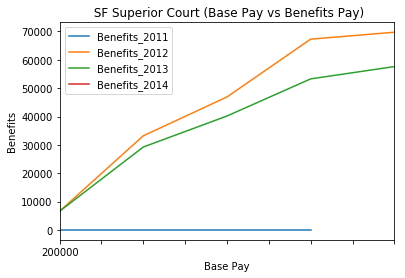

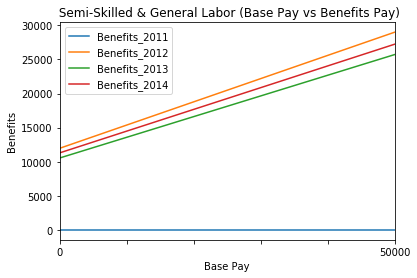

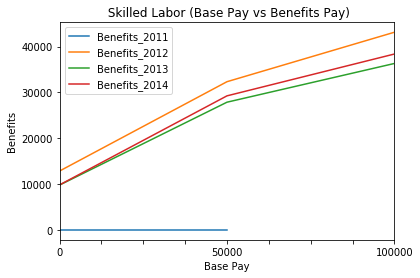

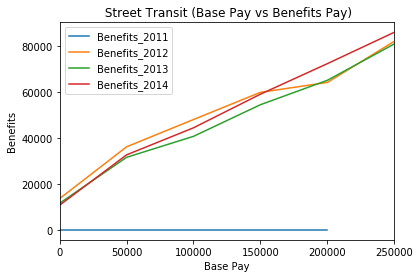

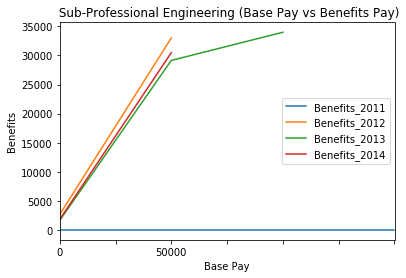

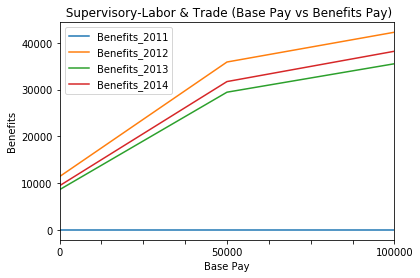

In [78]:
for title in df_1['Job_Family_r'].unique():
    df_per_title_11 = df_1.loc[df_1['Job_Family_r']==title]
    df_per_title_12 = df_2.loc[df_2['Job_Family_r']==title]
    df_per_title_13 = df_3.loc[df_3['Job_Family_r']==title]
    df_per_title_14 = df_4.loc[df_4['Job_Family_r']==title]
    
    
    plt.figure(figsize=(50,30))
    ax = df_per_title_11.plot(x= 'labelBasePay', y='Benefits_2011')
    ax2 = df_per_title_12.plot(x= 'labelBasePay', y= 'Benefits_2012', ax = ax)
    ax3 = df_per_title_13.plot(x= 'labelBasePay', y= 'Benefits_2013',ax =ax2)
    df_per_title_14.plot(x= 'labelBasePay', y= 'Benefits_2014',ax = ax3)
    ax.set_xlabel('Base Pay')
    ax.set_ylabel('Benefits')

    ax.set_title(' %s (Base Pay vs Benefits Pay)'%title)
    plt.show()